In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [18]:
train_df = pd.read_csv('/content/fraudTest.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('/content/fraudTrain.csv', index_col='Unnamed: 0')

In [19]:
train_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [20]:
train_df.shape

(555719, 22)

In [21]:
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())

0
0


In [22]:
is_fraud = train_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  2145
No:  553574


#Destribution of the gender with fraud status


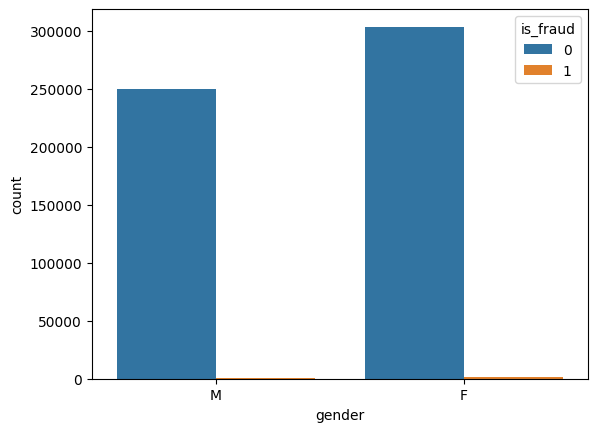

In [23]:
sns.countplot(x = 'gender', hue = 'is_fraud', data = train_df)
plt.show()

#converting the data type

In [25]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'],format='mixed')
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'],format='mixed')


#fraud per hour

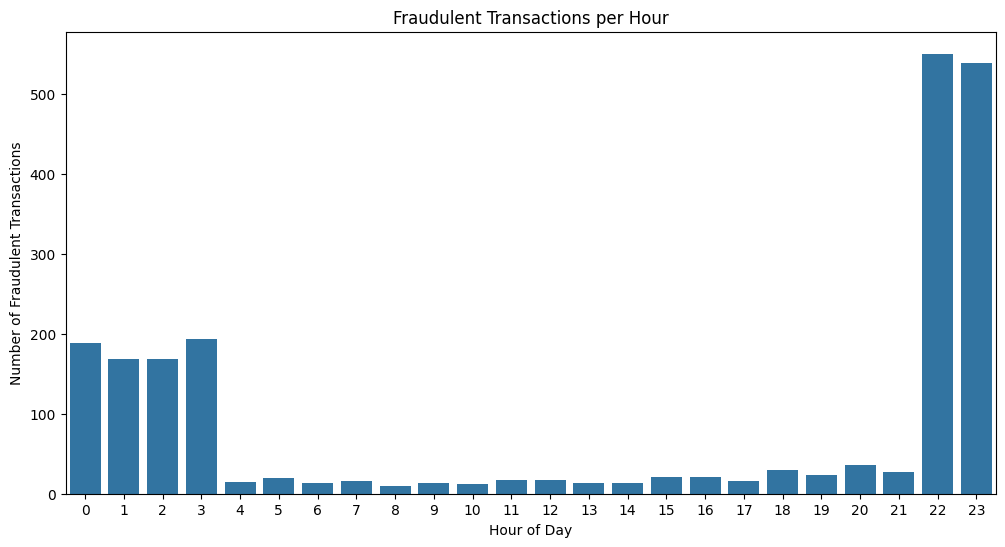

In [27]:

import matplotlib.pyplot as plt


train_df['hour'] = train_df['trans_date_trans_time'].dt.hour

fraud_by_hour = train_df.groupby('hour')['is_fraud'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions per Hour')
plt.show()


In [28]:
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour
0,fraud_Kirlin and Sons,personal_care,2.86,Elliott,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12
1,fraud_Sporer-Keebler,personal_care,29.84,Williams,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12


In [29]:
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  object 
 1   category    555719 non-null  object 
 2   amt         555719 non-null  float64
 3   last        555719 non-null  object 
 4   gender      555719 non-null  object 
 5   lat         555719 non-null  float64
 6   long        555719 non-null  float64
 7   city_pop    555719 non-null  int64  
 8   job         555719 non-null  object 
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
 12  hour        555719 non-null  int32  
dtypes: float64(5), int32(1), int64(2), object(5)
memory usage: 57.2+ MB


In [31]:
train_df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour
count,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,38.542798,-90.231380,0.003860,12.809062
std,156.745941,5.061336,13.721780,3.003909e+05,5.095829,13.733071,0.062008,6.810924
min,1.000000,20.027100,-165.672300,2.300000e+01,19.027422,-166.671575,0.000000,0.000000
25%,9.630000,34.668900,-96.798000,7.410000e+02,34.755302,-96.905129,0.000000,7.000000
50%,47.290000,39.371600,-87.476900,2.408000e+03,39.376593,-87.445204,0.000000,14.000000
75%,83.010000,41.894800,-80.175200,1.968500e+04,41.954163,-80.264637,0.000000,19.000000
max,22768.110000,65.689900,-67.950300,2.906700e+06,66.679297,-66.952026,1.000000,23.000000


In [44]:
from category_encoders import WOEEncoder

In [56]:
!pip install category_encoders
import category_encoders as ce
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

for col in ['job','merchant', 'category', 'lat', 'last']:
    encoder = ce.WOEEncoder(handle_unknown='ignore')  # Handle unknown categories
    train_df[col] = encoder.fit_transform(train_df[col],train_df['is_fraud'])



              precision    recall  f1-score   support

           0       0.89      0.89      0.89       426
           1       0.89      0.89      0.89       432

    accuracy                           0.89       858
   macro avg       0.89      0.89      0.89       858
weighted avg       0.89      0.89      0.89       858

Logistic Regression accuracy is: 89.28%


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer


In [58]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model training


In [59]:
model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       426
           1       0.89      0.89      0.89       432

    accuracy                           0.89       858
   macro avg       0.89      0.89      0.89       858
weighted avg       0.89      0.89      0.89       858

Logistic Regression accuracy is: 89.28%
